In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade flair

     |████████████████████████████████| 322 kB 12.2 MB/s 
     |████████████████████████████████| 48 kB 5.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 43.2 MB/s 
     |████████████████████████████████| 3.5 MB 43.3 MB/s 
     |████████████████████████████████| 788 kB 44.2 MB/s 
     |████████████████████████████████| 981 kB 43.6 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 6.8 MB 41.3 MB/s 
     |████████████████████████████████| 895 kB 19.6 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=737b91b90677e75f16a52e3359e1a535c8c0d97113f50

In [3]:
%cd /content/drive/MyDrive/LAP/Subjects/AP1/labs

/content/drive/MyDrive/LAP/Subjects/AP1/labs


# ASSIGNMENT 1: Training your own NER model

In this lab we will train a NER model in a **language of your interest** and use it to tag texts for that language. To train a NER (SequenceTagger) model we need the following:


1. An annotated corpus in the IOB2 format. You can load your own or use one of the many available in Flair: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_6_CORPUS.md#named-entity-recognition
  + CoNLL 2003 for English and German are not publicly available but you can find the required files in the following google drive folder:
  '/content/drive/My Drive/Colab Notebooks/2021-ILTAPP/datasets/ner'
2. At least one WordEmbedding or FlairEmbeddings. You can check the ones available in the tutorial.
  + Static Word Embeddings:https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/CLASSIC_WORD_EMBEDDINGS.md
  + FlairEmbeddings: https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md
  + NOTE: Remember that the embeddings can be combined (Stacked): https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md
3. Instantiate a SequenceTagger and a Model Trainer: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md
4. Run! (perhaps consider downsampling the training data and setting at first a lower number of epochs, just to check that the training works).
5. HINT: You can also print your corpus statistics using the corpus obtain_statistics() function. This will give you an idea of the size of your dataset.

In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List

In [5]:
# if using your own corpus, define the existing columns in the dataset
columns = {0:'text', 1:'ner'}

# TODO get the corpus into a ColumnCorpus object
corpus = ColumnCorpus(data_folder='../datasets/ner', train_file='eu-train.tsv', 
                      dev_file='eu-dev.tsv', test_file='eu-test.tsv', column_format=columns)

# TODO obtain and print corpus statistics (output below obtained with the BASQUE NER corpus)
print(corpus.obtain_statistics())

2022-02-22 22:05:46,490 Reading data from ../datasets/ner
2022-02-22 22:05:46,498 Train: ../datasets/ner/eu-train.tsv
2022-02-22 22:05:46,503 Dev: ../datasets/ner/eu-dev.tsv
2022-02-22 22:05:46,510 Test: ../datasets/ner/eu-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 2552,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 44408,
            "min": 1,
            "max": 113,
            "avg": 17.401253918495296
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 842,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 15351,
            "min": 1,
            "max": 74,
            "avg": 18.231591448931116
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_documents": 2552,
        "number_of_documents

In [6]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  """


[b'O', b'B-ORG', b'B-PER', b'I-PER', b'I-ORG', b'B-LOC', b'I-LOC', b'B-MISC', b'I-MISC', b'<START>', b'<STOP>']


In [7]:
# TODO initialize embeddings (output below refers to WordEmbeddings('eu'), 
# FlairEmbeddings('eu-forward') and FlairEmbeddings('eu-backward'))
word_embedding = WordEmbeddings('eu')
flair_embedding_forward = FlairEmbeddings('eu-forward')
flair_embedding_backward = FlairEmbeddings('eu-backward')
embeddings = StackedEmbeddings([word_embedding, flair_embedding_forward, flair_embedding_backward])

2022-02-22 22:05:50,854 https://flair.informatik.hu-berlin.de/resources/embeddings/token/eu-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp9invheug


100%|██████████| 283358528/283358528 [00:16<00:00, 17117936.47B/s]

2022-02-22 22:06:07,527 copying /tmp/tmp9invheug to cache at /root/.flair/embeddings/eu-wiki-fasttext-300d-1M.vectors.npy


2022-02-22 22:06:08,043 removing temp file /tmp/tmp9invheug
2022-02-22 22:06:08,203 https://flair.informatik.hu-berlin.de/resources/embeddings/token/eu-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmp7ev81xag


100%|██████████| 9342871/9342871 [00:00<00:00, 25144769.71B/s]

2022-02-22 22:06:08,682 copying /tmp/tmp7ev81xag to cache at /root/.flair/embeddings/eu-wiki-fasttext-300d-1M
2022-02-22 22:06:08,701 removing temp file /tmp/tmp7ev81xag


2022-02-22 22:06:10,158 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-eu-opus-large-forward-v0.2.pt not found in cache, downloading to /tmp/tmpeiw6b97i


100%|██████████| 109092471/109092471 [00:03<00:00, 34724994.97B/s]

2022-02-22 22:06:13,397 copying /tmp/tmpeiw6b97i to cache at /root/.flair/embeddings/lm-eu-opus-large-forward-v0.2.pt


2022-02-22 22:06:13,612 removing temp file /tmp/tmpeiw6b97i
2022-02-22 22:06:26,178 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-eu-opus-large-backward-v0.2.pt not found in cache, downloading to /tmp/tmpnncbtiwn


100%|██████████| 109092471/109092471 [00:03<00:00, 35864110.95B/s]

2022-02-22 22:06:29,315 copying /tmp/tmpnncbtiwn to cache at /root/.flair/embeddings/lm-eu-opus-large-backward-v0.2.pt


2022-02-22 22:06:29,548 removing temp file /tmp/tmpnncbtiwn


In [8]:
# TODO initialize sequence tagger
from flair.models import SequenceTagger
tag_type = 'ner'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  after removing the cwd from sys.path.


In [9]:
# TODO initialize trainer
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [10]:
# TODO train 
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)
# results obtained with the BASQUE NER corpus over 10 epochs (inspect the output generated below)
trainer.train('../resources/flair-ner-eu',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=10)

2022-02-22 22:06:30,469 ----------------------------------------------------------------------------------------------------
2022-02-22 22:06:30,472 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'eu'
      (embedding): Embedding(236133, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4396, out_features=4396, bi

{'dev_loss_history': [tensor(0.1577, device='cuda:0'),
  tensor(0.0912, device='cuda:0'),
  tensor(0.0768, device='cuda:0'),
  tensor(0.0652, device='cuda:0'),
  tensor(0.0542, device='cuda:0'),
  tensor(0.0522, device='cuda:0'),
  tensor(0.0419, device='cuda:0'),
  tensor(0.0406, device='cuda:0'),
  tensor(0.0353, device='cuda:0'),
  tensor(0.0340, device='cuda:0')],
 'dev_score_history': [0.6425732737208146,
  0.7681979728840331,
  0.8001021189685983,
  0.8395378690629012,
  0.8601009447392262,
  0.8559958559958559,
  0.88471570161711,
  0.8862385321100916,
  0.9018932874354562,
  0.9017976925140863],
 'test_score': 0.7885906040268456,
 'train_loss_history': [0.3512813191095186,
  0.15478853431183504,
  0.12671413702527545,
  0.11082203142107382,
  0.0969726731811122,
  0.09068951166936716,
  0.08112041706696134,
  0.07950048724974926,
  0.07471282828758266,
  0.06853192300543959]}

2022-02-22 22:16:15,122 ----------------------------------------------------------------------------------------------------
2022-02-22 22:16:15,125 WARNING: No LOSS found for test split in this data.
2022-02-22 22:16:15,128 Are you sure you want to plot LOSS and not another value?
2022-02-22 22:16:15,129 ----------------------------------------------------------------------------------------------------
2022-02-22 22:16:15,165 ----------------------------------------------------------------------------------------------------
2022-02-22 22:16:15,166 WARNING: No F1 found for test split in this data.
2022-02-22 22:16:15,170 Are you sure you want to plot F1 and not another value?
2022-02-22 22:16:15,174 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in ../resources/flair-ner-eu/training.png


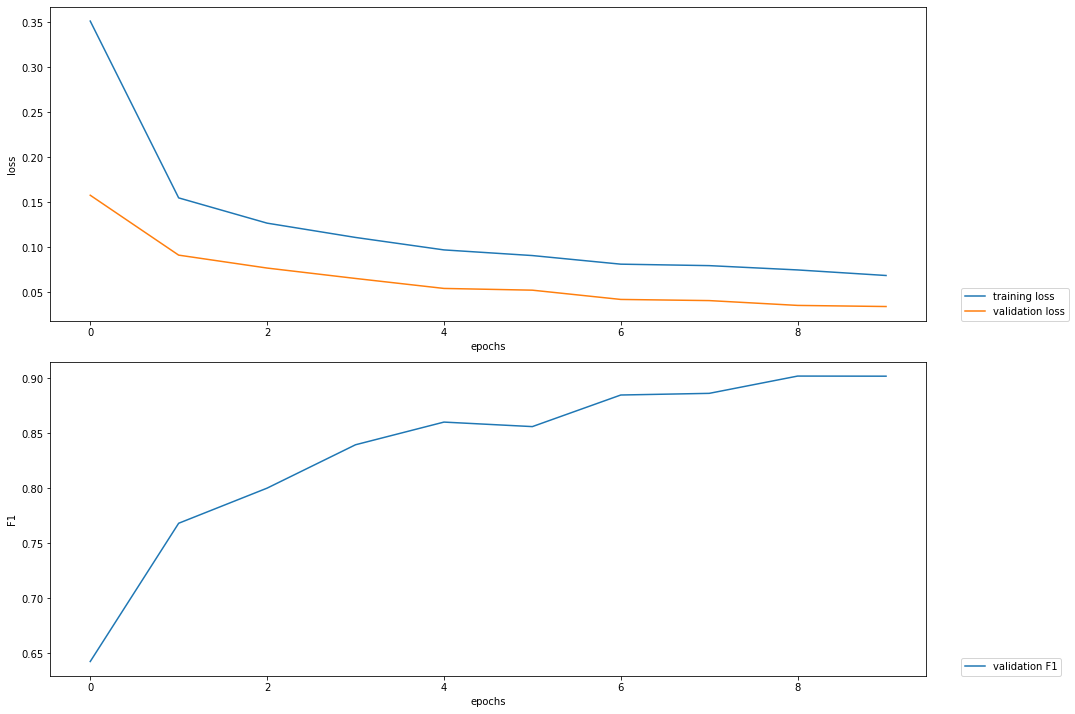

In [11]:
# TODO plot training loss and weights
# HINT Check documentation on training models with Flair
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('../resources/flair-ner-eu/loss.tsv')

# ASSIGNMENT 2

In this assignment we will use the model trained in the previous step to automatically tag a document of your choice.

1. HINT: Revise the TUTORIAL_2_TAGGING to see how to use a SequenceTagger to tag texts. Remember that to use your own model you need to instantiate the SequenceTagger providing the full path of your model, like so:

```
ner_tagger = SequenceTagger.load('/content/drive/My Drive/Colab Notebooks/2021-ILTAPP/eu-flair-model/final-model.pt')
```

2. Save the document in your drive as a plain text file.
3. Load the file and instantiate the SequenceTagger with your model.
4. Predict the NER tags with your model.
5. Inspect the annotations obtained. You can do this in various ways:
  + By saving the annotated file to a text document in your drive.
  + By inspecting the annotations via iteration over the Sentence objects to extract the ner annotations for each token.


In [12]:
ner_tagger = SequenceTagger.load('../resources/flair-ner-eu/final-model.pt')

2022-02-22 22:16:17,699 loading file ../resources/flair-ner-eu/final-model.pt


In [17]:
from segtok.segmenter import split_single
from flair.data import Sentence

def print_tags_doc(filename):
    with open(filename) as f:
        text = f.read()

    doc = Sentence(text, use_tokenizer=False)
    ner_tagger.predict(doc)
    doc_sents = split_single(doc.to_tagged_string())
    for text in doc_sents:
        if text != "":
            print(text)

def print_tags_sent(filename):
    with open(filename) as f:
        text = f.read()

    doc_texts = split_single(text)
    sentences = []
    for text in doc_texts:
        if text != "":
            sentence = Sentence(text, use_tokenizer=False)
            sentences.append(sentence)

    ner_tagger.predict(sentences)
    for sentence in sentences:
        print(sentence.to_tagged_string())

In [18]:
print_tags_doc('../resources/berria.txt')

Jeroen <B-PER> Dijsselbloem <I-PER> Eurotaldeko <B-ORG> presidentearekin egin du bilera Varufakisek, <B-PER> eta haren aurrean nabarmendu du Greziako <B-ORG> Gobernua <I-ORG> "egungo erreskate plana onartzen ez duen programa batengatik" aukeratu zutela herritarrek.
Hala ere, azaldu du gobernuaren asmoa da Europako <B-LOC> kidekin elkarlanean aritzea dela.
"Saiatuko gara gure kideak konbentzitzen irtenbide bat topatu behar dugula Europako <B-LOC> interes komunen alde", esan du Varufakisek.
Dijsselbloemek, <B-PER> berriz, gogorarazi du erreskate plana otsail amaierara arte luzatzekoa dela, eta gaineratu du: "Hori baino lehen, erabakiko dugu zer egingo den.
Ez dago ondoriorik oraindik".
Greziako <B-LOC> zorrari buruzko konferentzia bat egitea proposatu dio Varufakisek; <B-PER> "konferentzia hori jada existitzen da eta Eurotaldea <B-ORG> du izena", erantzun dio.
Eurotaldeak Greziari <B-ORG> laguntzeko konpromisoa duela adierazi du Dijsselbloemek, <B-PER> "Greziak <B-ORG> bere hitza betetze

In [19]:
print_tags_sent('../resources/berria.txt')

Jeroen <B-PER> Dijsselbloem <I-PER> Eurotaldeko <B-ORG> presidentearekin egin du bilera Varufakisek, <B-PER> eta haren aurrean nabarmendu du Greziako <B-ORG> Gobernua <I-ORG> "egungo erreskate plana onartzen ez duen programa batengatik" aukeratu zutela herritarrek.
Hala ere, azaldu du gobernuaren asmoa da Europako <B-LOC> kidekin elkarlanean aritzea dela.
"Saiatuko gara gure kideak konbentzitzen irtenbide bat topatu behar dugula Europako <B-LOC> interes komunen alde", esan du Varufakisek. <B-PER>
Dijsselbloemek, <B-PER> berriz, gogorarazi du erreskate plana otsail amaierara arte luzatzekoa dela, eta gaineratu du: "Hori baino lehen, erabakiko dugu zer egingo den.
Ez dago ondoriorik oraindik".
Greziako <B-LOC> zorrari buruzko konferentzia bat egitea proposatu dio Varufakisek; <B-PER> "konferentzia hori jada existitzen da eta Eurotaldea du izena", erantzun dio.
Eurotaldeak Greziari <B-ORG> laguntzeko konpromisoa duela adierazi du Dijsselbloemek, <B-PER> "Greziak <B-LOC> bere hitza betetze